#### This Notebook is done for Pixelated Data for 1 Compton, 2 PhotoElectric with 2 more Ambiguity!
#### I got 82% Accuracy on Test set! 
##### I am getting X from Blurred Dataset, y as labels from Ground Truth

In [2]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import math

df = {'Label':[],
      'Theta_P1':[], 'Theta_E1':[], 'Theta_P2':[], 'Theta_E2':[], 'Theta_P3':[], 'Theta_E3':[], 'Theta_P4':[], 'Theta_E4':[],
      'Theta_P5':[], 'Theta_E5':[], 'Theta_P6':[], 'Theta_E6':[], 'Theta_P7':[], 'Theta_E7':[], 'Theta_P8':[], 'Theta_E8':[],
      'Theta_P9':[], 'Theta_E9':[], 'Theta_P10':[], 'Theta_E10':[], 'Theta_P11':[], 'Theta_E11':[], 'Theta_P12':[], 'Theta_E12':[],
      'Theta_P13':[], 'Theta_E13':[], 'Theta_P14':[], 'Theta_E14':[], 'Theta_P15':[], 'Theta_E15':[], 'Theta_P16':[], 'Theta_E16':[],
      'y': []}

with open("Data/oo_test_Output_16.csv", 'r') as f:
    counter = 0
    counter_Theta_E = 0
    for line in f:
        sline = line.split('\t')

        if len(sline) == 34:
            df['Label'].append(int(sline[0]))
            df['Theta_P1'].append(float(sline[1]))
            df['Theta_E1'].append(float(sline[2]))
            df['Theta_P2'].append(float(sline[3]))
            df['Theta_E2'].append(float(sline[4]))   
            df['Theta_P3'].append(float(sline[5]))
            df['Theta_E3'].append(float(sline[6]))
            df['Theta_P4'].append(float(sline[7]))
            df['Theta_E4'].append(float(sline[8]))
            
            df['Theta_P5'].append(float(sline[9]))
            df['Theta_E5'].append(float(sline[10]))
            df['Theta_P6'].append(float(sline[11]))
            df['Theta_E6'].append(float(sline[12]))   
            df['Theta_P7'].append(float(sline[13]))
            df['Theta_E7'].append(float(sline[14]))
            df['Theta_P8'].append(float(sline[15]))
            df['Theta_E8'].append(float(sline[16]))
            
            df['Theta_P9'].append(float(sline[17]))
            df['Theta_E9'].append(float(sline[18]))
            df['Theta_P10'].append(float(sline[19]))
            df['Theta_E10'].append(float(sline[20]))   
            df['Theta_P11'].append(float(sline[21]))
            df['Theta_E11'].append(float(sline[22]))
            df['Theta_P12'].append(float(sline[23]))
            df['Theta_E12'].append(float(sline[24]))
            
            df['Theta_P13'].append(float(sline[25]))
            df['Theta_E13'].append(float(sline[26]))
            df['Theta_P14'].append(float(sline[27]))
            df['Theta_E14'].append(float(sline[28]))   
            df['Theta_P15'].append(float(sline[29]))
            df['Theta_E15'].append(float(sline[30]))
            df['Theta_P16'].append(float(sline[31]))
            df['Theta_E16'].append(float(sline[32]))
            df['y'].append(int(sline[33]))

    
# df.info() Counts Nan in the dataset

df = pd.DataFrame(df)
df.to_csv('GroundTruth.csv', index=False)

df[20:60]

,Label,Theta_P1,Theta_E1,Theta_P2,Theta_E2,Theta_P3,Theta_E3,Theta_P4,Theta_E4,Theta_P5,...,Theta_E12,Theta_P13,Theta_E13,Theta_P14,Theta_E14,Theta_P15,Theta_E15,Theta_P16,Theta_E16,y
20,1,61.795919,103.710160,119.246056,76.136597,62.320124,103.710160,120.224334,89.002778,179.996324,...,93.086399,121.263974,89.002778,59.261194,93.086399,178.776210,103.710160,179.113569,76.136597,1
21,1,80.217925,64.230507,101.933992,163.280403,2.918872,64.230507,179.396471,163.280403,96.027867,...,90.270892,94.199323,108.726303,80.415635,64.230507,86.033206,90.270892,101.738446,163.280403,6
22,1,121.303673,180.000000,97.824297,58.529789,121.069448,180.000000,97.947499,58.529789,2.498319,...,58.529789,103.720952,54.648417,76.510896,180.000000,103.720952,180.000000,103.489104,54.648417,7
23,1,118.658118,72.804377,116.450955,124.204280,74.457593,72.804377,88.631986,140.269235,120.033978,...,62.714276,74.215825,72.804377,120.256714,124.204280,118.404222,72.804377,116.571782,124.204280,1
24,1,64.583774,57.220474,115.794700,180.000000,99.538551,113.642522,74.910190,57.220474,91.862349,...,180.000000,99.905040,113.642522,90.701323,102.825326,2.286938,57.220474,179.268310,180.000000,1
25,1,4.444505,106.913880,179.332895,72.485518,117.601910,133.346198,64.056817,68.601368,4.327603,...,68.601368,111.707496,106.913880,73.158025,72.485518,113.086760,106.913880,113.626907,133.346198,7
26,1,60.711747,65.421412,110.810761,112.126283,61.351419,65.421412,122.102479,146.331243,157.203515,...,82.536887,179.238242,65.421412,179.191183,146.331243,179.270075,65.421412,179.192250,146.331243,0
27,1,179.997030,94.849496,179.821081,81.513329,107.287230,94.849496,73.992052,81.513329,77.791094,...,81.513329,104.662830,97.000657,72.802053,81.513329,179.255771,90.770861,179.164192,97.000657,4
28,1,178.021854,74.392284,179.465351,111.039122,138.218204,180.000000,87.296108,58.995195,71.041811,...,111.039122,25.920208,58.995195,115.326820,111.039122,154.683809,180.000000,71.602189,74.392284,7
29,1,177.504041,61.526693,179.185864,158.237663,177.590590,61.526693,179.208134,158.237663,69.376807,...,75.654854,179.998805,106.914847,179.711903,75.654854,111.104849,158.237663,21.706285,75.654854,3


In [3]:
X = []
y = []


df = pd.read_csv('GroundTruth.csv')
for i in range(0, len(df)-1, 1): # these are from Blurred Data!
    features = df.loc[i, 'Theta_P1':'Theta_E16'].values.tolist()
    label = df.loc[i, 'y':'y'].values.tolist()
    
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)
y = to_categorical(y, num_classes=None, dtype='float32')
# print(y[0])

#     ID = df.loc[i,'ID']  # get family ID from blurred dataframe
#     gt_temp_rows = df[df['ID'] == ID] # find corresponding rows in grund truth dataframe
    
#     count = 0
#     if (len(gt_temp_rows)==0) or(len(gt_temp_rows)==1): # yani exactly we have 2 lines!
#         count += 1
#         continue

#     idx = gt_temp_rows.index.tolist()[0] # read the first row's index
    
# #     print(len(gt_temp_rows))
# #     print(gt_temp_rows.index.tolist())
# # #     set the target value
# #     print('********************')
# #     print('eventID_label:', int(sline[0]))
# #     print(gt_temp_rows)
#     if (gt_temp_rows.loc[idx, 'DDA':'DDA'].item() <= gt_temp_rows.loc[idx+1, 'DDA':'DDA'].item()):
#         label = 1
#     else:
#         label = 0

#     X.append(row1)
#     y.append(label)

    
# X = np.array(X)
# y = np.array(y)
# # print(y)
# y = to_categorical(y, num_classes=None, dtype='float32')
# # print(y)



In [4]:
y

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Define the Model

In [10]:
# Define the keras model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu')) #8, 8: 58  12, 8:64    32,16: 66   16,16: 67
model.add(Dense(32, activation='relu'))
# model.add(Dense(64, activation='relu'))


model.add(Dense(y.shape[1], activation='softmax'))
model.summary()#CNN, LSTM, RNN, Residual, dense

print(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 297       
Total params: 2,409
Trainable params: 2,409
Non-trainable params: 0
_________________________________________________________________


In [11]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#loss: categorical_crossentropy (softmax output vector mide: multi class classification) 
#binary_crossentropy (sigmoid output: binary classification)
#mean_squared_error MSE

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=500, batch_size=10, validation_split=0.15)

Epoch 1/500
1685/1685 [==============================] - 1s 618us/step - loss: 4.8338 - accuracy: 0.1270 - val_loss: 2.1564 - val_accuracy: 0.1289
Epoch 2/500
1685/1685 [==============================] - 1s 584us/step - loss: 2.1513 - accuracy: 0.1331 - val_loss: 2.1248 - val_accuracy: 0.1497
Epoch 3/500
1685/1685 [==============================] - 1s 587us/step - loss: 2.1087 - accuracy: 0.1572 - val_loss: 2.0853 - val_accuracy: 0.1588
Epoch 4/500
1685/1685 [==============================] - 1s 572us/step - loss: 2.0684 - accuracy: 0.1751 - val_loss: 2.0476 - val_accuracy: 0.1975
Epoch 5/500
1685/1685 [==============================] - 1s 583us/step - loss: 1.9984 - accuracy: 0.2185 - val_loss: 1.9831 - val_accuracy: 0.2224
Epoch 6/500
1685/1685 [==============================] - 1s 579us/step - loss: 1.9654 - accuracy: 0.2313 - val_loss: 1.9653 - val_accuracy: 0.2338
Epoch 7/500
1685/1685 [==============================] - 1s 575us/step - loss: 1.9421 - accuracy: 0.2353 - val_loss: 1

1685/1685 [==============================] - 1s 576us/step - loss: 0.5684 - accuracy: 0.8282 - val_loss: 0.6133 - val_accuracy: 0.8230
Epoch 112/500
1685/1685 [==============================] - 1s 581us/step - loss: 0.5649 - accuracy: 0.8296 - val_loss: 0.6732 - val_accuracy: 0.8149
Epoch 113/500
1685/1685 [==============================] - 1s 580us/step - loss: 0.5589 - accuracy: 0.8347 - val_loss: 0.6371 - val_accuracy: 0.8234
Epoch 114/500
1685/1685 [==============================] - 1s 576us/step - loss: 0.5586 - accuracy: 0.8314 - val_loss: 0.6678 - val_accuracy: 0.8055
Epoch 115/500
1685/1685 [==============================] - 1s 572us/step - loss: 0.5620 - accuracy: 0.8295 - val_loss: 0.6507 - val_accuracy: 0.8197
Epoch 116/500
1685/1685 [==============================] - 1s 581us/step - loss: 0.5605 - accuracy: 0.8334 - val_loss: 0.6656 - val_accuracy: 0.8170
Epoch 117/500
1685/1685 [==============================] - 1s 574us/step - loss: 0.5579 - accuracy: 0.8318 - val_loss: 0

1685/1685 [==============================] - 1s 581us/step - loss: 0.5203 - accuracy: 0.8440 - val_loss: 0.6339 - val_accuracy: 0.8308
Epoch 167/500
1685/1685 [==============================] - 1s 582us/step - loss: 0.5181 - accuracy: 0.8438 - val_loss: 0.6507 - val_accuracy: 0.8180
Epoch 168/500
1685/1685 [==============================] - 1s 573us/step - loss: 0.5174 - accuracy: 0.8437 - val_loss: 0.6258 - val_accuracy: 0.8237
Epoch 169/500
1685/1685 [==============================] - 1s 603us/step - loss: 0.5422 - accuracy: 0.8406 - val_loss: 0.6562 - val_accuracy: 0.8277
Epoch 170/500
1685/1685 [==============================] - 1s 579us/step - loss: 0.5143 - accuracy: 0.8464 - val_loss: 0.6668 - val_accuracy: 0.8126
Epoch 171/500
1685/1685 [==============================] - 1s 591us/step - loss: 0.5172 - accuracy: 0.8444 - val_loss: 0.6041 - val_accuracy: 0.8382
Epoch 172/500
1685/1685 [==============================] - 1s 584us/step - loss: 0.5135 - accuracy: 0.8433 - val_loss: 0

1685/1685 [==============================] - 1s 578us/step - loss: 0.5001 - accuracy: 0.8473 - val_loss: 0.6262 - val_accuracy: 0.8371
Epoch 222/500
1685/1685 [==============================] - 1s 581us/step - loss: 0.5092 - accuracy: 0.8477 - val_loss: 0.6104 - val_accuracy: 0.8412
Epoch 223/500
1685/1685 [==============================] - 1s 582us/step - loss: 0.4979 - accuracy: 0.8489 - val_loss: 0.6404 - val_accuracy: 0.8314
Epoch 224/500
1685/1685 [==============================] - 1s 572us/step - loss: 0.4992 - accuracy: 0.8496 - val_loss: 0.6375 - val_accuracy: 0.8371
Epoch 225/500
1685/1685 [==============================] - 1s 580us/step - loss: 0.5007 - accuracy: 0.8479 - val_loss: 0.7103 - val_accuracy: 0.8328
Epoch 226/500
1685/1685 [==============================] - 1s 577us/step - loss: 0.5028 - accuracy: 0.8492 - val_loss: 0.6772 - val_accuracy: 0.8328
Epoch 227/500
1685/1685 [==============================] - 1s 573us/step - loss: 0.5098 - accuracy: 0.8471 - val_loss: 0

1685/1685 [==============================] - 1s 588us/step - loss: 0.4942 - accuracy: 0.8527 - val_loss: 0.6918 - val_accuracy: 0.8375
Epoch 277/500
1685/1685 [==============================] - 1s 582us/step - loss: 0.4880 - accuracy: 0.8520 - val_loss: 0.7582 - val_accuracy: 0.8324
Epoch 278/500
1685/1685 [==============================] - 1s 572us/step - loss: 0.4963 - accuracy: 0.8516 - val_loss: 0.7429 - val_accuracy: 0.8341
Epoch 279/500
1685/1685 [==============================] - 1s 590us/step - loss: 0.4955 - accuracy: 0.8511 - val_loss: 0.7417 - val_accuracy: 0.8378
Epoch 280/500
1685/1685 [==============================] - 1s 583us/step - loss: 0.5018 - accuracy: 0.8481 - val_loss: 0.6054 - val_accuracy: 0.8486
Epoch 281/500
1685/1685 [==============================] - 1s 576us/step - loss: 0.4923 - accuracy: 0.8527 - val_loss: 0.6446 - val_accuracy: 0.8405
Epoch 282/500
1685/1685 [==============================] - 1s 589us/step - loss: 0.4914 - accuracy: 0.8519 - val_loss: 0

1685/1685 [==============================] - 1s 572us/step - loss: 0.4852 - accuracy: 0.8567 - val_loss: 0.8082 - val_accuracy: 0.8250
Epoch 332/500
1685/1685 [==============================] - 1s 574us/step - loss: 0.4835 - accuracy: 0.8555 - val_loss: 0.7202 - val_accuracy: 0.8378
Epoch 333/500
1685/1685 [==============================] - 1s 568us/step - loss: 0.4899 - accuracy: 0.8518 - val_loss: 0.7817 - val_accuracy: 0.8358
Epoch 334/500
1685/1685 [==============================] - 1s 573us/step - loss: 0.5102 - accuracy: 0.8497 - val_loss: 0.6755 - val_accuracy: 0.8405
Epoch 335/500
1685/1685 [==============================] - 1s 578us/step - loss: 0.4838 - accuracy: 0.8545 - val_loss: 0.7718 - val_accuracy: 0.8408
Epoch 336/500
1685/1685 [==============================] - 1s 596us/step - loss: 0.4850 - accuracy: 0.8549 - val_loss: 0.7667 - val_accuracy: 0.8408
Epoch 337/500
1685/1685 [==============================] - 1s 579us/step - loss: 0.4877 - accuracy: 0.8552 - val_loss: 0

1685/1685 [==============================] - 1s 581us/step - loss: 0.4857 - accuracy: 0.8538 - val_loss: 0.7495 - val_accuracy: 0.8516
Epoch 387/500
1685/1685 [==============================] - 1s 580us/step - loss: 0.4776 - accuracy: 0.8578 - val_loss: 0.6308 - val_accuracy: 0.8466
Epoch 388/500
1685/1685 [==============================] - 1s 572us/step - loss: 0.4849 - accuracy: 0.8570 - val_loss: 0.7519 - val_accuracy: 0.8439
Epoch 389/500
1685/1685 [==============================] - 1s 581us/step - loss: 0.4941 - accuracy: 0.8545 - val_loss: 0.7287 - val_accuracy: 0.8365
Epoch 390/500
1685/1685 [==============================] - 1s 572us/step - loss: 0.4770 - accuracy: 0.8599 - val_loss: 0.7569 - val_accuracy: 0.8483
Epoch 391/500
1685/1685 [==============================] - 1s 571us/step - loss: 0.4784 - accuracy: 0.8568 - val_loss: 0.7106 - val_accuracy: 0.8402
Epoch 392/500
1685/1685 [==============================] - 1s 576us/step - loss: 0.4825 - accuracy: 0.8555 - val_loss: 0

1685/1685 [==============================] - 1s 575us/step - loss: 0.4893 - accuracy: 0.8517 - val_loss: 1.0146 - val_accuracy: 0.8338
Epoch 442/500
1685/1685 [==============================] - 1s 574us/step - loss: 0.4734 - accuracy: 0.8597 - val_loss: 0.9193 - val_accuracy: 0.8382
Epoch 443/500
1685/1685 [==============================] - 1s 576us/step - loss: 0.4704 - accuracy: 0.8613 - val_loss: 1.0066 - val_accuracy: 0.8469
Epoch 444/500
1685/1685 [==============================] - 1s 569us/step - loss: 0.4788 - accuracy: 0.8568 - val_loss: 0.9070 - val_accuracy: 0.8398
Epoch 445/500
1685/1685 [==============================] - 1s 571us/step - loss: 0.4739 - accuracy: 0.8599 - val_loss: 1.0115 - val_accuracy: 0.8358
Epoch 446/500
1685/1685 [==============================] - 1s 577us/step - loss: 0.4786 - accuracy: 0.8554 - val_loss: 1.0479 - val_accuracy: 0.8351
Epoch 447/500
1685/1685 [==============================] - 1s 576us/step - loss: 0.4703 - accuracy: 0.8592 - val_loss: 0

1685/1685 [==============================] - 1s 571us/step - loss: 0.4896 - accuracy: 0.8535 - val_loss: 0.9483 - val_accuracy: 0.8271
Epoch 497/500
1685/1685 [==============================] - 1s 568us/step - loss: 0.4810 - accuracy: 0.8555 - val_loss: 0.8777 - val_accuracy: 0.8395
Epoch 498/500
1685/1685 [==============================] - 1s 566us/step - loss: 0.4674 - accuracy: 0.8589 - val_loss: 0.9277 - val_accuracy: 0.8371
Epoch 499/500
1685/1685 [==============================] - 1s 572us/step - loss: 0.4700 - accuracy: 0.8596 - val_loss: 0.9149 - val_accuracy: 0.8506
Epoch 500/500
1685/1685 [==============================] - 1s 563us/step - loss: 0.4778 - accuracy: 0.8583 - val_loss: 1.0086 - val_accuracy: 0.8479


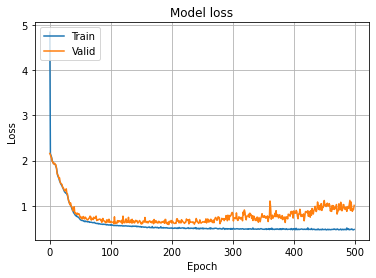

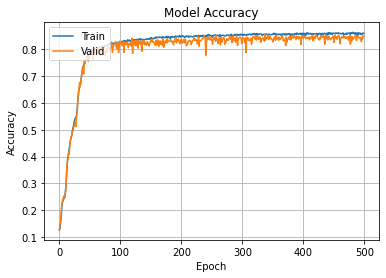

In [14]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()



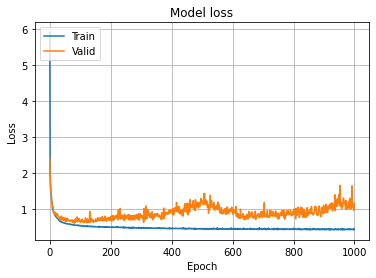

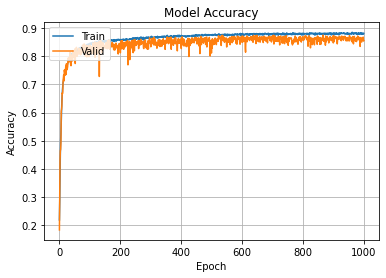

In [8]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()



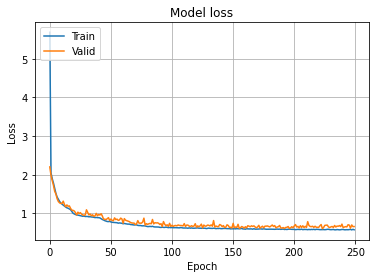

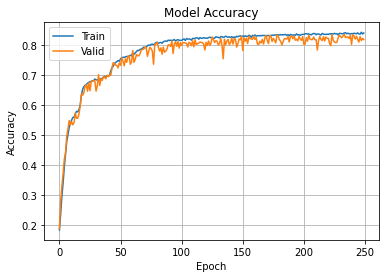

In [9]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
# plt.xticks(np.arange(1, 100, 5))
plt.show()



In [10]:
# Evaluating trained model on test set. This Accuracy came from DDA Labeling
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

155/155 [==============================] - 0s 508us/step - loss: 0.7739 - accuracy: 0.8238
Accuracy: 82.38


# HyperParameterOptimization

In [48]:
def create_model(hyperParams):
    
    hidden_layers = hyperParams['hidden_layers']
    activation = hyperParams['activation']
    dropout = hyperParams['dropout']
    output_activation = hyperParams['output_activation']
    loss = hyperParams['loss']
    input_size = hyperParams['input_size']
    output_size = hyperParams['output_size']
    
    model = Sequential()
    
    model.add(Dense(hidden_layers[0], input_shape=(input_size,), activation=activation))
    model.add(Dropout(dropout))
    for i in range(len(hidden_layers)-1):
        model.add(Dense(hidden_layers[i], activation=activation))
        model.add(Dropout(dropout))
    model.add(Dense(output_size, activation=output_activation))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    # categorical_crossentropy, binary_crossentropy
    
    return model

In [49]:
def cv_model_fit(X, y, hyperParams):
    
    kfold = KFold(n_splits=10, shuffle=True)
    scores=[]
    for train_idx, test_idx in kfold.split(X):
        model = create_model(hyperParams)
        model.fit(X[train_idx], y[train_idx], batch_size=hyperParams['batch_size'], 
                   epochs=hyperParams['epochs'], verbose=0)
        score = model.evaluate(X[test_idx], y[test_idx], verbose=0)
        
        scores.append(score*100) # f_score
#         print('fold ', len(scores), '  score: ', scores[-1])
        del model
        
    return scores

In [ ]:
# hyper parameter optimization
from itertools import product
from sklearn.model_selection import KFold
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D

# default parameter setting:
hyperParams = {'input_size': 4, 'output_size': 2, 'batch_size': 32, 'epochs': 100, 'hidden_layers': [512, 512, 128],
               'activation': 'relu', 'dropout': 0.5, 'output_activation': 'softmax', 'loss': 'categorical_crossentropy'}

# parameter search space:
batch_chices = [32]
epochs_choices = [100]
hidden_layers_choices = [[4, 4], [16, 32],
                         [8, 8, 8], [4, 8, 16],  
                         [4, 4, 4]]
activation_choices = ['relu', 'sigmoid'] #, 'tanh'
dropout_choices = [ 0.5]

s = [batch_chices, epochs_choices, hidden_layers_choices, activation_choices, dropout_choices]
perms = list(product(*s))  # permutations

# Linear search:
best_score = 0
for row in perms:
    hyperParams['batch_size'] = row[0]
    hyperParams['epochs'] = row[1]
    hyperParams['hidden_layers'] = row[2]
    hyperParams['activation'] = row[3]
    hyperParams['dropout'] = row[4]
    print('10-fold cross validation on these hyperparameters: ', hyperParams, '\n')
    cvscores = cv_model_fit(X, y, hyperParams)
    print('\n-------------------------------------------')
    mean_score = np.mean(cvscores)
    std_score = np.std(cvscores)
    # Update the best parameter setting:
    print('CV mean: {0:0.4f},  CV std: {1:0.4f}'.format(mean_score, std_score))
    if  mean_score > best_score:    # later I should incorporate std in best model selection
        best_score = mean_score
        print('****** Best model so far ******')
        best_params = hyperParams
    print('-------------------------------------------\n')